In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('atm_data_m2.csv')
data

,Unnamed: 0,atm_name,weekday,festival_religion,working_day,holiday_sequence,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn
0,11,Mount Road ATM,MONDAY,NH,W,WWW,1,1,2011,648600.0,897100
1,16,Mount Road ATM,TUESDAY,NH,W,WWW,1,1,2011,648600.0,826000
2,21,Mount Road ATM,WEDNESDAY,NH,W,WWW,1,1,2011,648600.0,754400
3,26,Mount Road ATM,THURSDAY,NH,W,WWW,2,1,2011,648600.0,834200
4,31,Mount Road ATM,FRIDAY,NH,W,WWW,2,1,2011,648600.0,575300
...,...,...,...,...,...,...,...,...,...,...,...
2239,11565,Mount Road ATM,MONDAY,NH,W,HWW,5,9,2017,276058.0,447400
2240,11570,Mount Road ATM,TUESDAY,NH,W,WWW,6,9,2017,276058.0,153800
2241,11575,Mount Road ATM,WEDNESDAY,NH,W,WWW,6,9,2017,276058.0,167100
2242,11580,Mount Road ATM,THURSDAY,NH,W,WWH,6,9,2017,276058.0,317400


In [5]:
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

count       2244.0
mean      515717.0
std       255179.0
min          100.0
25%       349475.0
50%       514100.0
75%       684925.0
max      1410700.0
Name: total_amount_withdrawn, dtype: float64

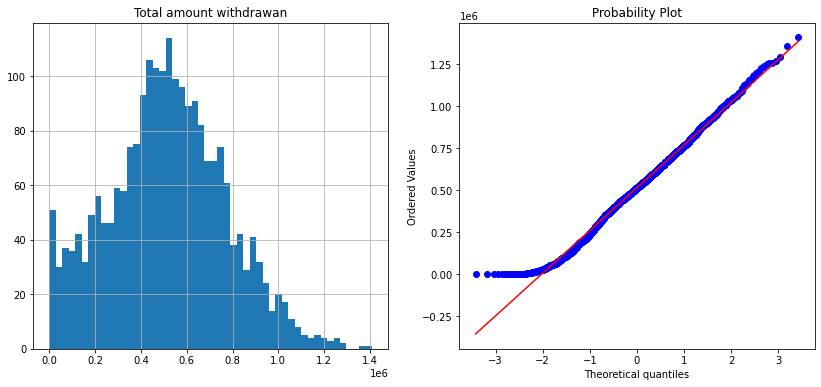

In [6]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
data['total_amount_withdrawn'].hist(bins=50)
plt.title('Total amount withdrawan')
plt.subplot(1,2,2)
stats.probplot(data['total_amount_withdrawn'], plot=plt);
data['total_amount_withdrawn'].describe().T.round()

In [19]:
# Copy the original data
features = data.copy()
# Select the numeric columns
numeric_subset = data[['trans_date_set','trans_month','trans_year','prevweek_mean', 'total_amount_withdrawn']]
# Select the categorical columns
# dropped atm_name
categorical_subset = data[['weekday','festival_religion', 'working_day',  'holiday_sequence']]
# One hot encoding
categorical_subset = pd.get_dummies(categorical_subset)
# Join the two dataframes using concat
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
features

,trans_date_set,trans_month,trans_year,prevweek_mean,total_amount_withdrawn,weekday_FRIDAY,weekday_MONDAY,weekday_SATURDAY,weekday_SUNDAY,weekday_THURSDAY,...,working_day_H,working_day_W,holiday_sequence_HHH,holiday_sequence_HHW,holiday_sequence_HWH,holiday_sequence_HWW,holiday_sequence_WHH,holiday_sequence_WHW,holiday_sequence_WWH,holiday_sequence_WWW
0,1,1,2011,648600.0,897100,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,1,2011,648600.0,826000,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1,2011,648600.0,754400,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,2,1,2011,648600.0,834200,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
4,2,1,2011,648600.0,575300,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,5,9,2017,276058.0,447400,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2240,6,9,2017,276058.0,153800,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2241,6,9,2017,276058.0,167100,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2242,6,9,2017,276058.0,317400,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0


In [8]:
from sklearn.model_selection import train_test_split
X = features.copy().drop(columns = ['total_amount_withdrawn', 'trans_date_set', 'trans_month','trans_year', 'working_day_H', 'working_day_W'])
y = features['total_amount_withdrawn'].copy()

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, shuffle= False, test_size = 0.2, random_state = 42)

print('length of Xtrain and Xtest: ', len(Xtrain), len(Xtest))
print('length of ytrain and ytest: ', len(ytrain), len(ytest))

length of Xtrain and Xtest:  1795 449
length of ytrain and ytest:  1795 449


In [29]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(Xtrain, ytrain)

# make predictions
lin_pred = linear.predict(Xtest)

# Prediction vs Actual
linpred = pd.DataFrame(lin_pred[-10:]) # predicting last 10 values
linpred.rename(columns = {0: 'lin_predicted'}, inplace=True) # renaming the column
linpred = linpred.round(decimals=0) # rounding the decimal values

d = pd.DataFrame(data['total_amount_withdrawn']).tail(10) # calling last 10 values of original amt wothdrawn

linpred.index = d.index # mapping the index of both dataframe
linok = pd.concat([linpred, d], axis=1)

linok['accuracy'] = round(linok.apply(lambda row: row.lin_predicted /row.total_amount_withdrawn *100, axis = 1),2)
linok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in linok['accuracy']],index = linok.index)
linok = linok.reset_index()

linok['index'] = pd.to_datetime(linok['index']) # convert to datetime type
linok['day_of_week'] = linok['index'].dt.day_name() # get the day of the week
linok = linok.drop(columns=['index']) # drop the original index column

In [30]:
linok

,lin_predicted,total_amount_withdrawn,accuracy,day_of_week
0,508440.0,308400,164.86%,Thursday
1,488103.0,312600,156.14%,Thursday
2,461633.0,337100,136.94%,Thursday
3,572903.0,251100,228.16%,Thursday
4,374079.0,182700,204.75%,Thursday
5,530596.0,447400,118.60%,Thursday
6,506257.0,153800,329.17%,Thursday
7,518418.0,167100,310.24%,Thursday
8,524031.0,317400,165.10%,Thursday
9,209299.0,305100,68.60%,Thursday


In [31]:
mean_lin_test = ytest.mean()
mean_lin_pred = lin_pred.mean()
print(mean_lin_test, mean_lin_pred)

accuracy = (mean_lin_pred/mean_lin_test)*100

print("Excess prediction: %\n", format(round(accuracy,2)))

246600.89086859688 480655.8517569125
Excess prediction: %
 194.91


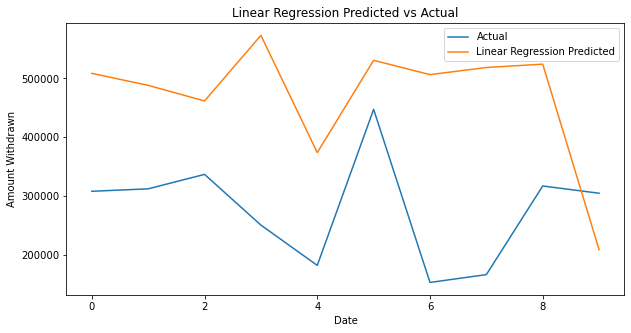

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(linok.index, linok.total_amount_withdrawn, label='Actual')
plt.plot(linok.index, linok.lin_predicted, label='Linear Regression Predicted')
plt.xlabel('Date')
plt.ylabel('Amount Withdrawn')
plt.title('Linear Regression Predicted vs Actual')
plt.legend()
plt.show()

In [33]:
from xgboost import XGBRegressor
xgb = XGBRegressor(objective = 'reg:squarederror' )
xgb.fit(Xtrain, ytrain)

# make predictions

xgb_pred = xgb.predict(Xtest)

xgbpred = pd.DataFrame(xgb_pred[-10:])

xgbpred.rename(columns = {0: 'xgb_predicted'}, inplace=True)

xgbpred = xgbpred.round(decimals=0)

xgbpred.index = d.index

xgbok = pd.concat([xgbpred, d], axis=1)

# convert index to DatetimeIndex
xgbok.index = pd.to_datetime(xgbok.index)

# compute accuracy
xgbok['accuracy'] = round(xgbok.apply(lambda row: row.xgb_predicted/row.total_amount_withdrawn *100, axis=1),2)

# format accuracy as percentage
xgbok['accuracy'] = pd.Series(["{0:.2f}%".format(val) for val in xgbok['accuracy']], index= xgbok.index)

# add day_of_week column
xgbok = xgbok.assign(day_of_week = lambda x: x.index.day_name())



In [34]:
xgbok

,xgb_predicted,total_amount_withdrawn,accuracy,day_of_week
1970-01-01 00:00:00.000002234,29213.0,308400,9.47%,Thursday
1970-01-01 00:00:00.000002235,356450.0,312600,114.03%,Thursday
1970-01-01 00:00:00.000002236,197966.0,337100,58.73%,Thursday
1970-01-01 00:00:00.000002237,90477.0,251100,36.03%,Thursday
1970-01-01 00:00:00.000002238,267407.0,182700,146.36%,Thursday
1970-01-01 00:00:00.000002239,199052.0,447400,44.49%,Thursday
1970-01-01 00:00:00.000002240,591902.0,153800,384.85%,Thursday
1970-01-01 00:00:00.000002241,127836.0,167100,76.50%,Thursday
1970-01-01 00:00:00.000002242,250156.0,317400,78.81%,Thursday
1970-01-01 00:00:00.000002243,94842.0,305100,31.09%,Thursday


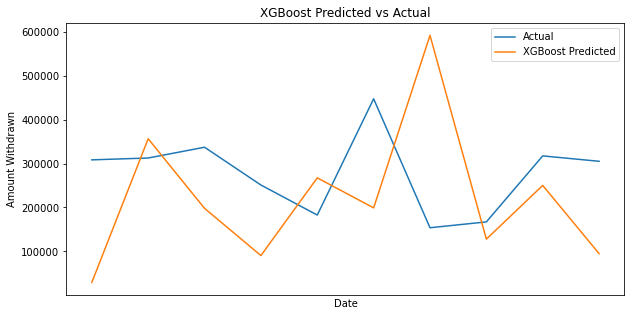

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(xgbok.index, xgbok.total_amount_withdrawn, label='Actual')
plt.plot(xgbok.index, xgbok.xgb_predicted, label='XGBoost Predicted')
plt.xlabel('Date')
plt.ylabel('Amount Withdrawn')
plt.title('XGBoost Predicted vs Actual')
plt.legend()
plt.show()


In [16]:
mean_xgb_test = ytest.mean()
mean_xgb_pred = xgb_pred.mean()
print(mean_xgb_test, mean_xgb_pred)

accuracy = (mean_xgb_test / mean_xgb_pred)*100
print('accuracy:', round(accuracy, 2) )


246600.89086859688 286123.56
accuracy: 86.19
